<a href="https://colab.research.google.com/github/lenagrumbach/projeto_regressao_linear/blob/main/projeto_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importação de bibliotecas

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

##Importação de dados

In [21]:
from google.colab import drive
 
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [22]:
df_diamonds = pd.read_csv('/drive/MyDrive/Diamantes/diamonds.csv')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [23]:
df_rick_diamonds = pd.read_csv('/drive/MyDrive/Diamantes/rick_diamonds.csv')
df_rick_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


##Análise exploratória

In [24]:
df_diamonds['price'].mean()

3934.409644462607

In [29]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [30]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


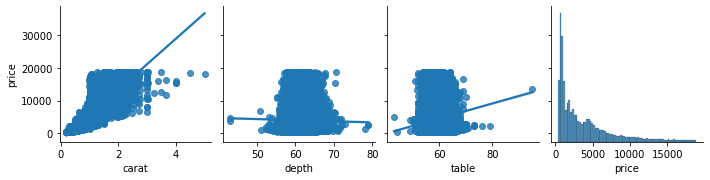

In [45]:
sns.pairplot(df_diamonds,kind='reg',y_vars='price', x_vars=['carat', 'depth', 'table', 'price'])

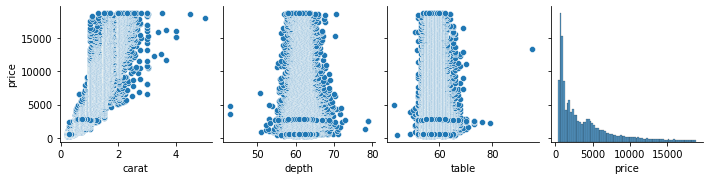

In [46]:
sns.pairplot(data = df_diamonds, y_vars='price', x_vars=['carat', 'depth', 'table', 'price'])

In [34]:
df_diamonds.corr()['price']

carat    0.922186
depth   -0.012037
table    0.127832
price    1.000000
x        0.885019
y        0.864059
z        0.860247
Name: price, dtype: float64

##Modelagem

In [35]:
X = df_diamonds[['carat']]
y = df_diamonds['price']

In [36]:
modelo_diamonds = LinearRegression()

In [37]:
modelo_diamonds.fit(X,y)

LinearRegression()

In [55]:
print(f"A cada 1 carat adicionado ao diamante o preço sobe {modelo_diamonds.coef_}. Se um diamante tivesse 0 carat o preço seria {modelo_diamonds.intercept_}")

A cada 1 carat adicionado ao diamante o preço sobe [7759.35277644]. Se um diamante tivesse 0 carat o preço seria -2256.13169307386


In [65]:
predict = modelo_diamonds.predict(df_rick_diamonds[['carat']])

In [66]:
df_rick_diamonds['price_predicted'] = predict
df_rick_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,4804.879333
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,692.422362
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1778.731751
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,6279.156361
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,15435.192637


##Salvar resultados

In [67]:
df_rick_diamonds.to_csv('diamonds_return.csv')

In [68]:
from google.colab import files
files.download('diamonds_return.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Documentação de versões

Previsão com preço médio histórico, RMSE = 3980.713882502374

Previsão com mediana de preço histórico, RMSE = 4255.533080942974

Previsão com regressão linear simples usando a variável carat, RMSE = 1605.15175707362